## Importing packages

In [1]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
#install_all_packages()
load_library_packages()

Warning message:
"package 'here' was built under R version 4.1.1"
here() starts at C:/Users/maria/Desktop/Programacao/IC/projetos/Barreiras-e-Facilitadores

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
Warning message:
"package 'cluster' was built under R version 4.1.3"
Warning message:
"package 'cowplot' was built under R version 4.1.1"
Warning message:
"package 'randomForest' was built under R version 4.1.1"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.1.1"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"
Carregando pacotes exigidos: rpart

Warning message:
"package 'readxl' was built under R version 4.1.2"
Warning message:
"package 'e107

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

[[29]]
[1] TRUE

[[30]]
[1] TRUE

[[31]]
[1] TRUE

[[32]]
[1] TRUE

[[33]]
[1] TRUE

[[34]]
[1] TRUE

[[35]]
[1] TRUE

[[36]]
[1] TRUE

[[37]]
[1] TRUE

[[38]]
[1] TRUE

[[39]]
[1] TRUE

[[40]]
[1] TRUE

[[41]]
[1] TRUE

In [2]:
dim(df_during_barriers)

[1] 1214    6

## Clustering - Kmodes Fisher

In [3]:
df_during_barriers_dist <- distinct(df_during_barriers)
nrow(df_during_barriers_dist)

[1] 33

### Caliski

<hr />

#### Scanning parameters

In [4]:
source(here('Modules','modules.R'))
nseed <- 1000
nk <- nrow(distinct(df_during_barriers))
# ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
# for (seed in 1:nseed) {
#     calisnki <- c()
#     for (k in 2:nk) {
#         fs <- calisnki_values_kmodes(k, df_during_barriers_dist, 200, seed)[[1]]
#         calisnki <- append(calisnki, fs)
#     }

#     ks_by_seed[seed, ] <- calisnki
# }

# write.csv(
#     ks_by_seed,
#     "../../Data/calisnki_kmodes_or_barriers.csv", row.names = FALSE
# )

#### Results

In [5]:
cal <- read.csv("../../../Data/calisnki_kmodes_or_barriers.csv")
cal[, ncol(cal)+1] <-  seq.int(nrow(cal))
colnames(cal) <- append(2:nrow(distinct(df_during_barriers)), "seed")
head(cal)

,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,seed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>
1,7.233333,94.09091,35.64583,212.3333,243.00000,416.0000,13.000000,363.000000,181.44444,10.46897,...,3.7333333,0.6048000,1.7076923,1.6296296,0.4615385,0.19098143,0.04266667,0.010322581,NA,1
2,53.142857,55.38462,971.50000,665.0000,345.60000,111.2222,460.714286,10.026316,296.44444,50.60000,...,2.7179487,5.8240000,0.4165103,0.9971510,0.2971429,0.08578638,0.13333333,0.051612903,NA,2
3,119.490909,1260.00000,460.77778,223.0000,379.80000,888.3333,339.285714,25.772727,78.79630,17.60000,...,3.6000000,0.2458537,0.6213018,0.0767841,0.1530612,0.05793103,0.13333333,0.004962779,NA,3
4,33.932432,172.50000,129.80952,235.6667,66.82500,227.5000,15.000000,22.071429,92.85185,226.60000,...,4.0000000,0.2868293,0.2138837,0.2666667,0.1600000,0.08275862,0.26666667,0.014162077,NA,4
5,52.565217,124.61538,153.59259,374.5000,345.60000,335.8333,9.461153,483.000000,16.35556,338.80000,...,0.9466667,0.5936000,0.1857411,0.2370370,0.3296703,0.57931034,0.02666667,0.002580645,NA,5
6,62.837838,92.64706,309.33333,693.0000,40.70769,192.8333,10.837438,8.689655,126.50000,2.80000,...,0.8133333,1.2923077,0.5353846,0.2529359,0.5054945,0.22281167,0.05333333,0.044665012,NA,6


In [6]:
# options(repr.plot.width=20, repr.plot.height=10)
# ggplot(
#    data=melt(cal, id.vars='seed'), aes(x = variable, y = value)
# ) + geom_point() + facet_wrap(~ seed) 


####  Best K and best seed by highest sample mean

In [7]:
print("Best K")
best_K_kmodes <- match(max(apply(cal, 2, mean)[1:(nk-2)]), apply(cal, 2, mean)) + 1
print(best_K_kmodes)
print("Best Seed")
best_seed_kmodes <- match(max(cal[, best_K_kmodes-1]), cal[, best_K_kmodes-1])
print(best_seed_kmodes)
print("Calisnki")
print(max(cal[, best_K_kmodes-1]))

[1] "Best K"
[1] 5
[1] "Best Seed"
[1] 637
[1] "Calisnki"
[1] 2226


## Exploring Kmodes best k

In [8]:

chosen_kmode = kmodes_seed(df_during_barriers_dist, best_K_kmodes, max_iter=200, seed=best_seed_kmodes)
df_during_barriers_dist$cluster <- chosen_kmode$cluster
head(df_during_barriers_dist)

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard,cluster
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>
1,1,0,0,0,0,0,2
2,1,0,1,0,0,0,2
3,0,0,0,0,1,0,3
4,1,0,0,0,0,1,2
5,1,1,0,0,0,0,2
6,0,0,0,0,0,1,4


In [9]:
joint <- c(
    'PA_barrier_places_closed_dangerous'='PA_barrier_places_closed_dangerous',
    'PA_barrier_money' = 'PA_barrier_money',
    'PA_barrier_no_interest'='PA_barrier_no_interest',
    'PA_barrier_percieve'='PA_barrier_percieve',
    'PA_barrier_time' = 'PA_barrier_time',
    'PA_barrier_hard' = 'PA_barrier_hard'
)

df_during_barriers <- left_join(df_during_barriers, df_during_barriers_dist, by = joint)
df_during$cluster <- df_during_barriers$cluster
nrow(df_during_barriers)

[1] 1214

In [10]:
table(df_during$cluster)


  1   2   3   4   5 
 98 513 120 472  11 

### Profile Plots
<hr />

#### Practice of Exercise 

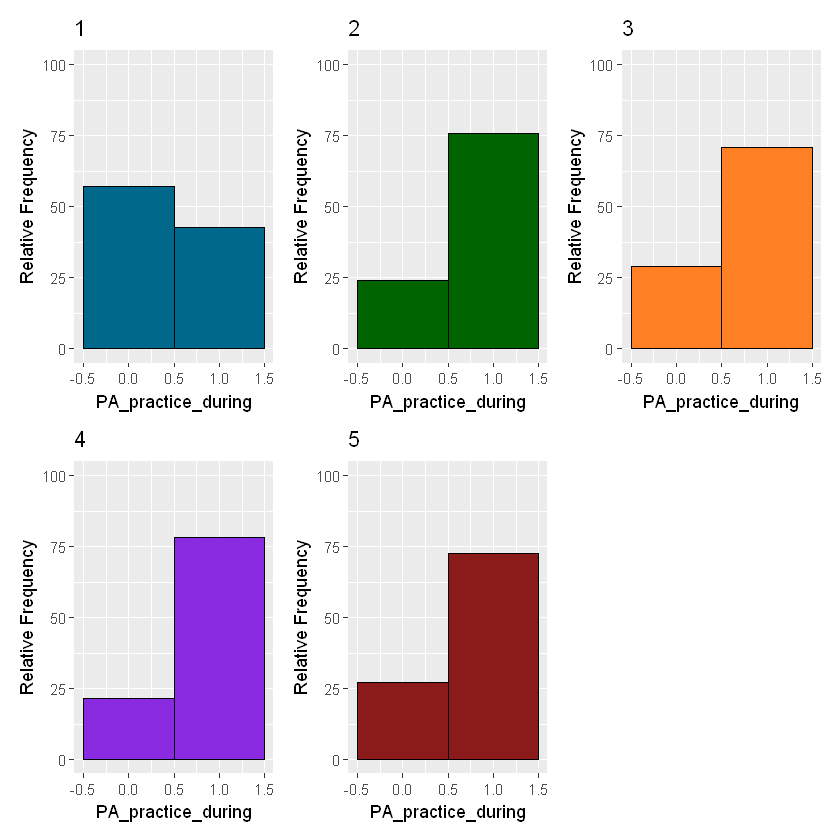

In [11]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_practice_during))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_practice_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100)  
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)


#### Sedentary Behavior

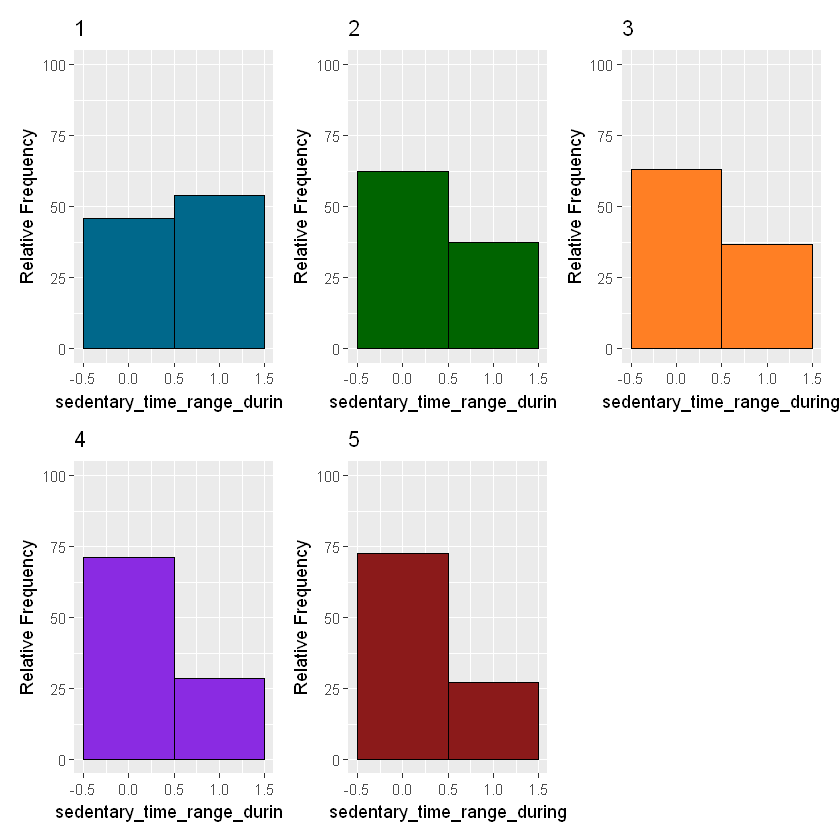

In [12]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$sedentary_time_range_during))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=sedentary_time_range_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)


#### Exercise Intensity

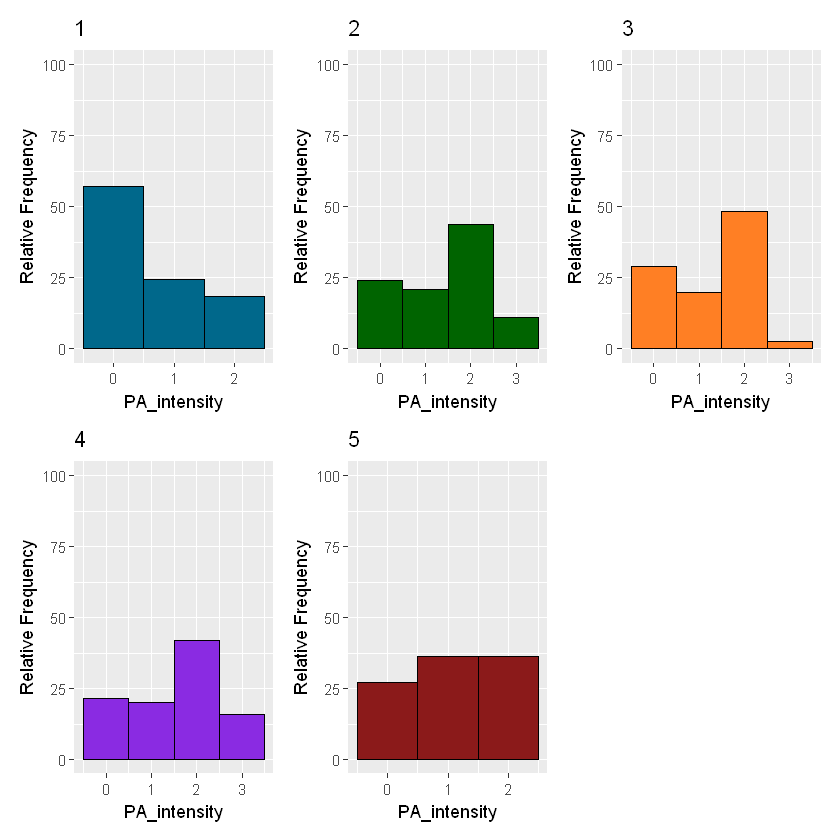

In [13]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_intensity))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_intensity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Exercise Duration

Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


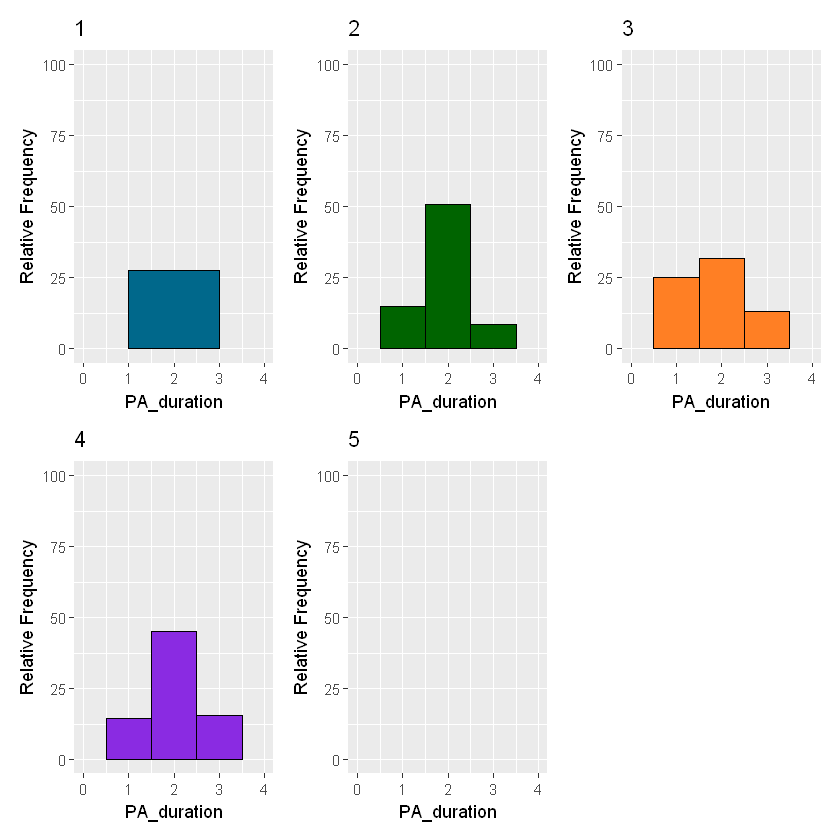

In [29]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_duration))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_duration, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) + scale_x_continuous(limits = c(0, 4))
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Exercise Weekly Frequency

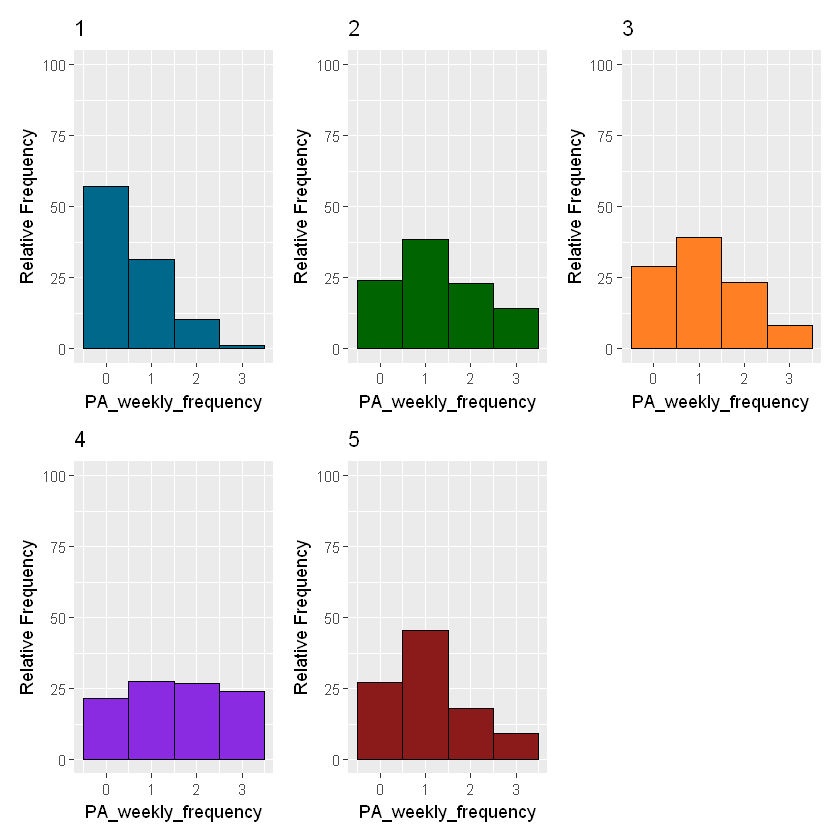

In [15]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_weekly_frequency))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_weekly_frequency, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



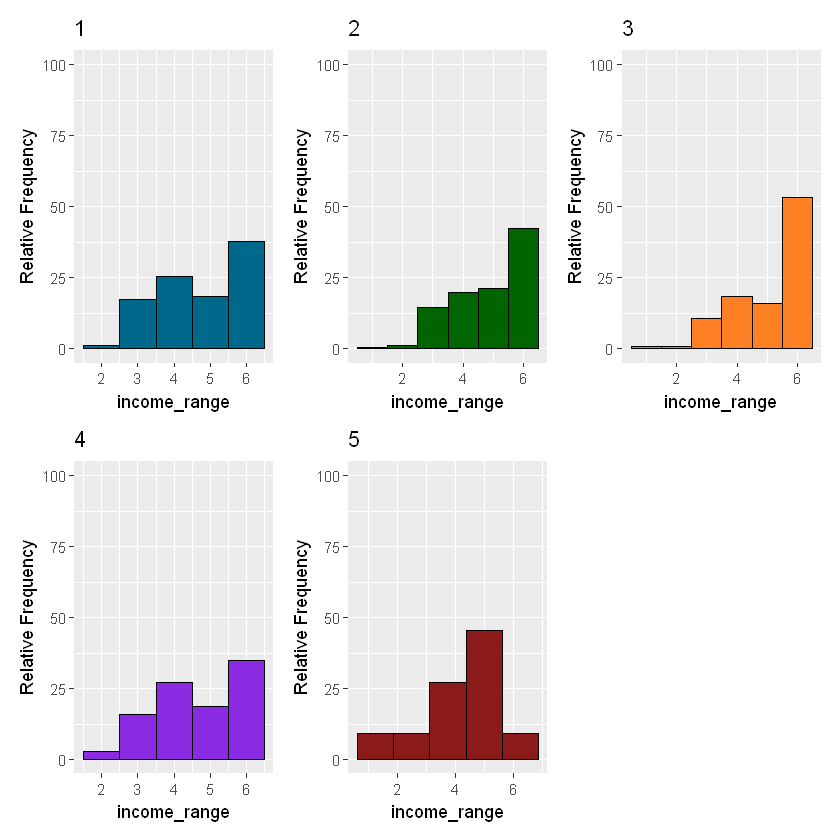

In [16]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$income_range))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=income_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Income Range

In [17]:
factor(df_during$income_range)

[1] 6 5 3 6 6 6 6 4 6 3 6 6 6 4 6 6 5 5 5 6 5 5 6 4 6 6 6 4 5 3 5 6 6 4 6 4 4
  [38] 5 6 6 4 3 2 5 6 4 4 6 6 6 6 6 6 4 5 6 5 3 6 4 6 6 5 5 5 6 5 5 6 3 6 5 6 6
  [75] 4 5 5 5 6 6 6 5 6 6 4 6 4 6 3 6 5 6 4 4 5 3 6 6 4 3 4 4 6 6 6 6 3 3 6 5 6
 [112] 6 6 5 3 6 5 6 4 5 3 4 6 6 4 4 6 6 6 6 6 6 3 6 5 5 5 4 6 5 3 4 6 6 3 5 4 6
 [149] 4 4 6 6 5 6 4 4 6 4 1 5 4 4 6 6 4 6 6 3 3 3 4 5 6 6 4 4 3 6 4 4 3 4 3 6 4
 [186] 6 4 6 6 6 6 6 5 6 6 5 3 6 5 6 4 5 6 5 4 6 6 6 5 6 6 6 3 6 6 6 4 5 4 6 6 5
 [223] 4 4 5 4 6 4 6 4 6 6 4 3 6 5 3 6 4 5 6 4 5 6 3 2 5 6 6 6 6 6 3 6 6 4 5 4 4
 [260] 6 6 6 5 6 6 5 3 6 6 6 6 6 6 6 6 4 4 4 6 6 3 6 4 6 3 6 5 6 5 5 3 6 6 6 5 6
 [297] 5 4 3 6 4 4 4 4 6 4 4 3 6 5 4 4 1 4 6 6 6 3 6 5 2 3 3 6 4 3 3 3 6 6 5 6 5
 [334] 4 4 5 6 3 2 6 6 6 4 5 6 5 6 4 4 5 5 4 6 5 6 6 5 6 3 6 5 2 2 5 3 6 4 6 6 4
 [371] 6 6 5 5 6 5 3 5 6 5 3 6 4 6 4 6 2 6 6 4 6 4 4 6 6 6 6 6 6 4 3 4 3 4 3 6 5
 [408] 2 6 6 4 3 4 4 6 4 3 6 4 4 3 3 6 6 6 5 3 3 6 6 6 6 6 5 4 6 4 6 5 6 6 6 6 6
 [445] 6 3 6 6 6 3 6 3 3 6 6 4 5 6 6 4 6 6 6 4 3 5 6 6 4 6 3 6 3 5 5 4 6 4 3 3 6
 [482] 3 2 6 6 6 6 6 6 5 3 4 3 6 4 6 6 6 6 6 6 6 4 6 6 6 5 6 5 4 4 6 6 4 6 6 4 4
 [519] 3 6 6 4 6 5 4 3 3 6 6 3 3 5 6 4 6 5 5 3 6 6 6 4 2 4 5 4 5 5 5 6 4 2 3 6 6
 [556] 3 6 3 5 6 4 6 6 5 6 6 4 4 3 3 6 5 6 5 5 3 5 6 4 3 3 6 6 6 6 6 5 6 4 6 5 6
 [593] 6 6 6 3 4 6 6 5 4 4 4 4 6 5 4 5 6 6 3 5 3 3 6 4 3 5 5 5 6 3 3 4 2 6 6 6 5
 [630] 6 4 6 3 6 5 4 6 6 6 3 4 6 6 6 3 4 6 6 5 6 6 6 6 4 5 5 4 6 5 6 4 5 5 5 3 6
 [667] 6 5 6 4 6 2 6 6 4 4 4 5 5 5 5 6 4 1 4 4 6 6 4 4 5 5 6 6 4 6 6 2 6 6 6 4 4
 [704] 6 6 6 6 6 5 3 4 4 4 6 6 6 6 6 6 6 6 6 5 6 6 6 3 6 6 5 5 4 5 6 6 4 6 5 6 6
 [741] 6 5 4 4 6 3 5 6 5 6 4 3 6 4 6 6 6 5 4 6 6 5 6 4 5 5 6 4 6 6 5 6 6 5 6 6 5
 [778] 4 6 6 6 6 5 5 6 6 6 6 6 4 5 6 6 6 6 4 6 3 4 3 4 6 6 3 3 4 4 4 5 6 6 5 5 3
 [815] 6 5 3 5 3 6 6 4 3 2 6 5 5 3 3 4 5 3 3 3 3 6 3 5 2 4 6 3 5 4 4 4 4 6 6 6 4
 [852] 6 2 5 6 5 6 6 4 6 6 3 4 4 6 6 6 5 6 4 6 5 3 4 6 4 5 5 6 5 5 6 6 6 3 5 5 6
 [889] 6 4 6 5 4 6 4 5 4 6 6 3 6 6 3 6 5 6 6 5 3 5 4 3 4 3 4 6 5 6 6 4 6 5 6 1 4
 [926] 4 5 6 4 4 4 5 6 5 4 5 6 5 4 5 4 4 4 3 4 4 3 4 3 3 4 5 3 5 6 3 4 4 4 3 5 3
 [963] 3 5 4 4 4 6 4 5 4 5 4 5 3 5 4 5 3 4 6 5 5 3 3 5 4 4 4 3 3 4 4 4 5 5 6 6 5
[1000] 3 3 6 2 4 5 4 4 2 6 3 6 6 3 5 6 4 5 3 6 3 3 4 5 5 4 6 4 4 6 6 4 5 6 6 3 5
[1037] 4 5 6 5 6 6 4 6 4 4 6 6 3 6 4 3 6 5 4 3 3 5 3 4 5 4 6 5 6 3 6 3 6 3 6 5 3
[1074] 5 6 3 6 5 3 5 6 6 6 1 3 6 4 4 4 4 5 3 5 5 5 6 4 5 3 5 4 6 6 6 4 5 6 6 6 4
[1111] 6 3 5 5 6 2 6 4 3 5 3 6 5 5 6 3 4 5 3 4 4 4 5 4 4 5 4 6 6 4 5 4 4 6 3 5 3
[1148] 4 5 6 4 3 4 5 2 3 3 6 3 5 3 3 5 3 4 3 4 4 6 5 5 4 4 3 5 6 5 4 3 3 3 2 4 3
[1185] 5 5 4 6 6 3 4 6 3 4 4 4 5 4 3 6 3 4 5 5 5 4 4 4 6 4 3 3 6 6
Levels: 1 2 3 4 5 6

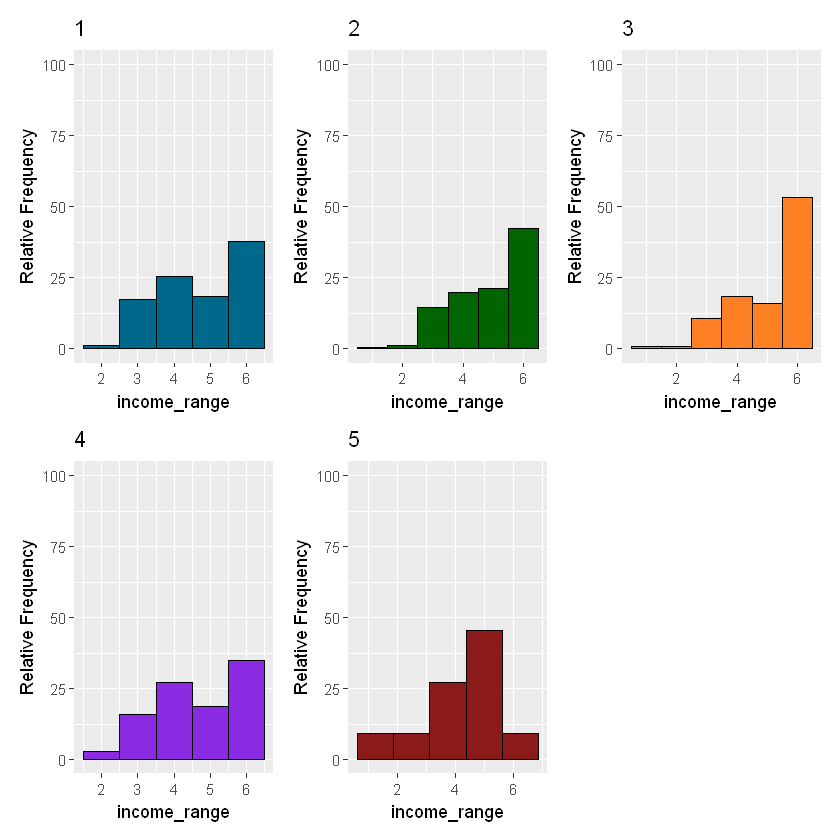

In [18]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$income_range))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=income_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



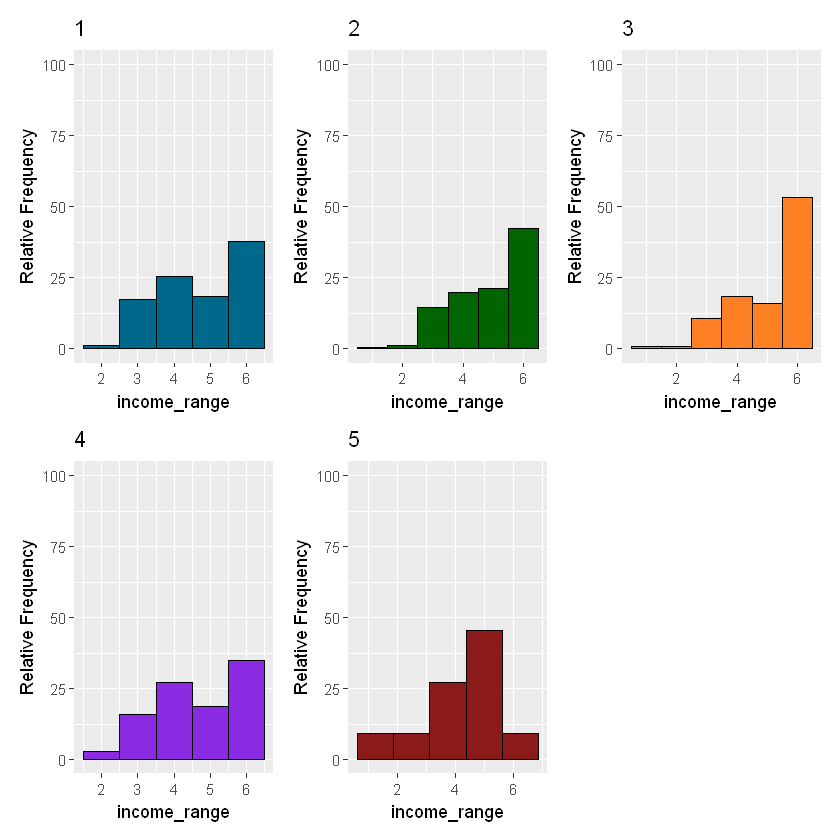

In [24]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$income_range))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=income_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100)
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Age Range

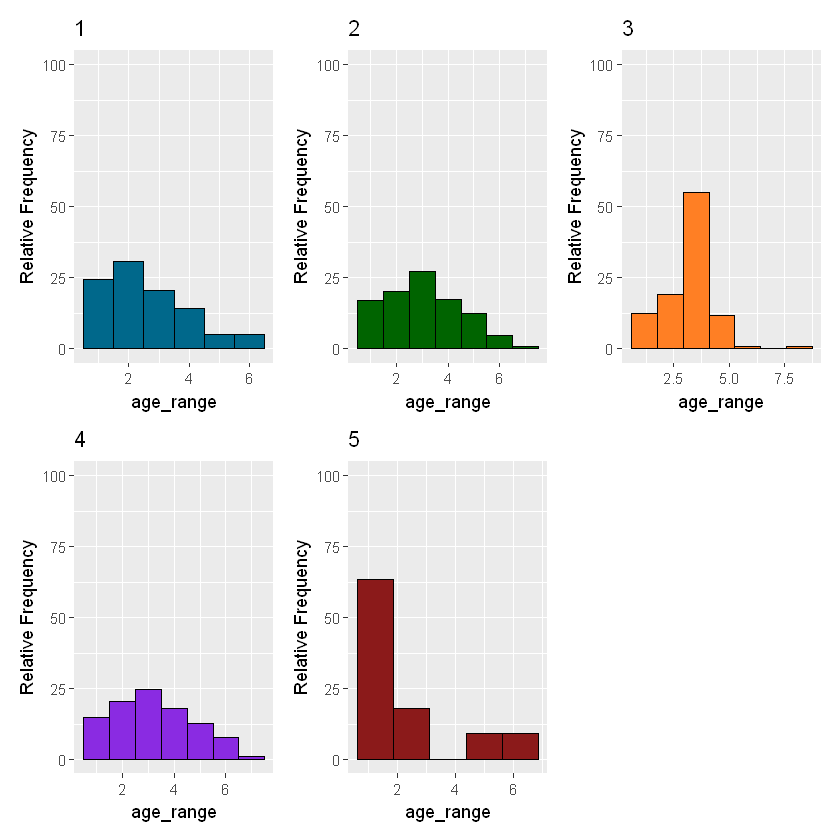

In [19]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$age_range))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=age_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Sex

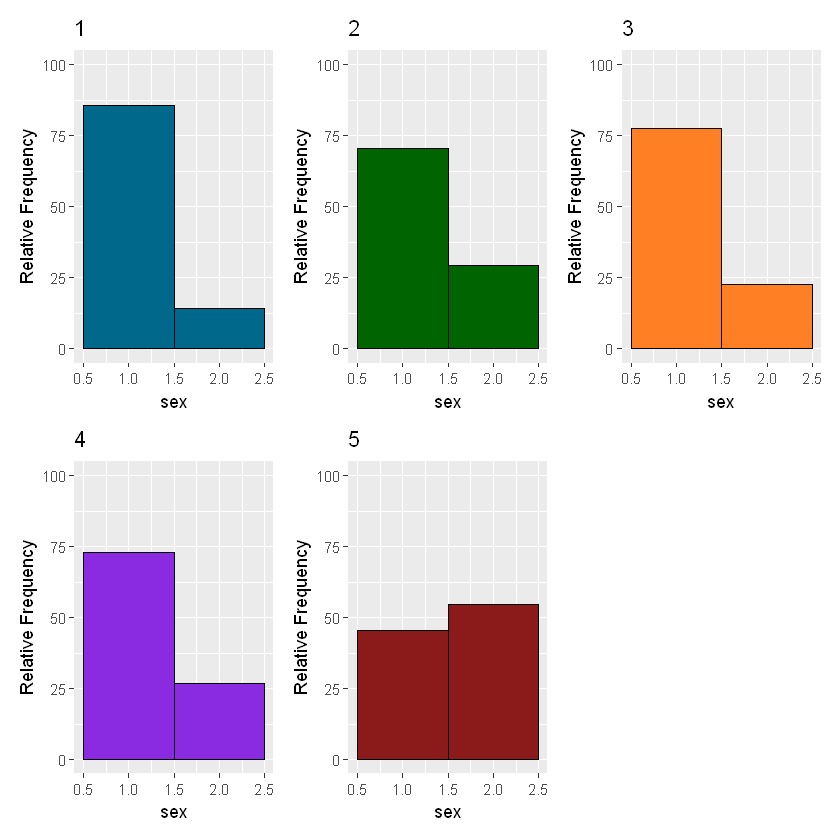

In [20]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$sex))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=sex, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Scholarity

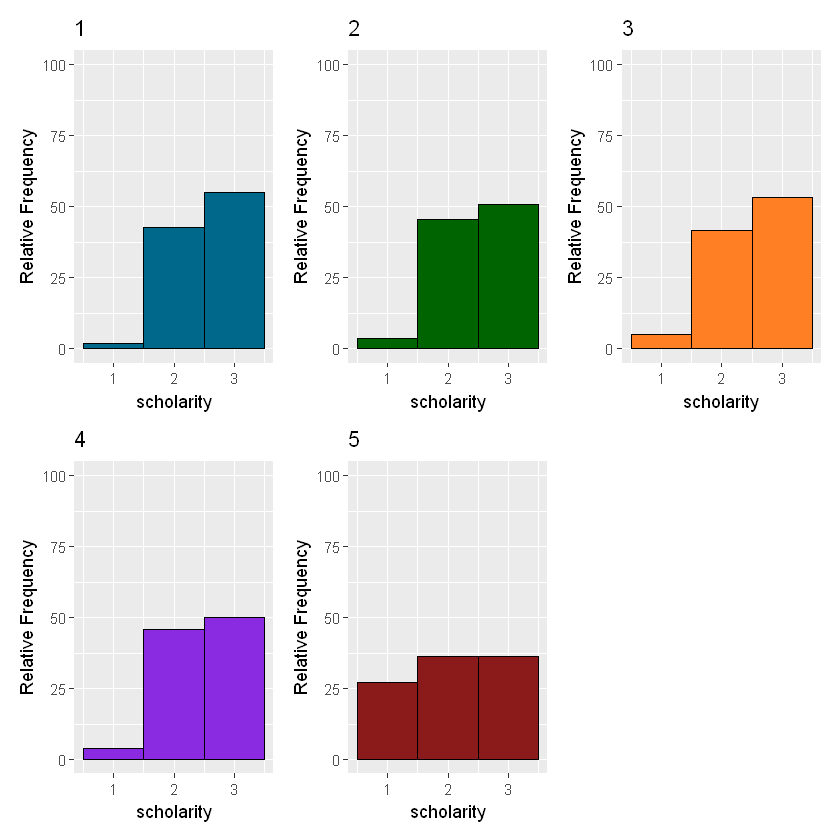

In [21]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$scholarity))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=scholarity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)

#### Modas

In [22]:
chosen_kmode$modes

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,1,1,1,0,1,1
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,0
5,0,0,0,1,0,1
